In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers, Sequential, Model
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('water_potability_2.csv')

In [3]:
df.head(10)

,ph,Turbidity
0,NaN,2.963135
1,3.716080,4.500656
2,8.099124,3.055934
3,8.316766,4.628771
4,9.092223,4.075075
5,5.584087,2.559708
6,10.223862,2.672989
7,8.635849,4.401425
8,NaN,3.595017
9,11.180284,4.370562


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ph         2785 non-null   float64
 1   Turbidity  3276 non-null   float64
dtypes: float64(2)
memory usage: 51.3 KB


In [5]:
df.isnull().sum()

ph           491
Turbidity      0
dtype: int64

In [6]:
df.describe()

,ph,Turbidity
count,2785.000000,3276.000000
mean,7.080795,3.966786
std,1.594320,0.780382
min,0.000000,1.450000
25%,6.093092,3.439711
50%,7.036752,3.955028
75%,8.062066,4.500320
max,14.000000,6.739000


In [7]:
df=df.dropna()
df.head(10)

,ph,Turbidity
1,3.716080,4.500656
2,8.099124,3.055934
3,8.316766,4.628771
4,9.092223,4.075075
5,5.584087,2.559708
6,10.223862,2.672989
7,8.635849,4.401425
9,11.180284,4.370562
10,7.360640,3.662292
11,7.974522,4.011718


In [8]:
#df['ph']=df['ph'].fillna(df['ph'].mean())
#df.head(5)
#(df['ph']==7).value_counts()

<Figure size 360x360 with 0 Axes>

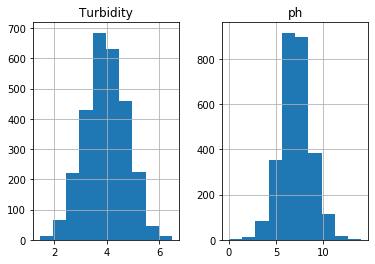

In [9]:
plt.figure(figsize=(5,5))
df.hist()
plt.show()

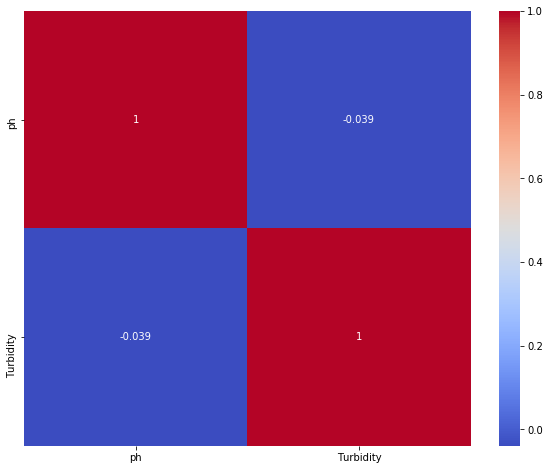

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [11]:
def water_type(x):
    if x>7:
        y='Basic'
    elif x<7:
        y='Acidic'
    elif x==7:
        y='Neutral'
    return y
        
for x in df['ph']:
        df['pH_Type'] = df['ph'].apply(lambda x: water_type(x))

In [12]:
df['pH_Type'].value_counts()

Basic     1417
Acidic    1368
Name: pH_Type, dtype: int64

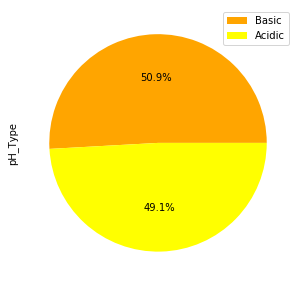

In [13]:
plt.figure(figsize=(7,5))
df['pH_Type'].value_counts().plot(kind='pie',labels = ['','',''], autopct='%1.1f%%', 
                                  colors = ['orange','yellow','salmon'])
plt.legend(labels=['Basic','Acidic','Neutral'])
plt.show()
#sns.countplot(data=df, x='pH_Type',hue='pH_Type')

In [14]:
def Turbidity_for_potability(q):
    if q>5:
        p='Above range'
    elif q<5:
        p='Medium'
    elif q<=1:
        p='Good for Drinking water'
    return p
df['Turbidity_Type'] = df['Turbidity'].apply(lambda q: Turbidity_for_potability(q))

In [15]:
df['Turbidity_Type'].value_counts()

Medium         2512
Above range     273
Name: Turbidity_Type, dtype: int64

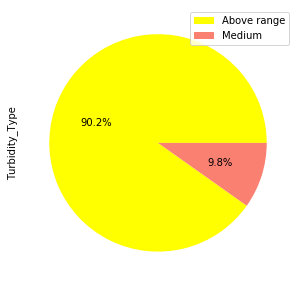

In [16]:
plt.figure(figsize=(7,5))
df['Turbidity_Type'].value_counts().plot(kind='pie',labels = ['','',''], autopct='%1.1f%%', 
                                                   colors = ['yellow','salmon','blue'])

plt.legend(labels=['Above range', 'Medium','Good for Drinking water'])
plt.show()

In [17]:
df['Turbidity_Type'] = df['Turbidity'].apply(lambda q: Turbidity_for_potability(q))

In [18]:
def Potability(q):
    if q<1:
        p=1
    else:
        p=0
    return p
df['Potability'] = df['Turbidity'].apply(lambda q: Potability(q)) 
#df['Potability'] = df['pH_Type'].apply(lambda q: Potability(q))

In [19]:
def Potability_1(q):
    if q<=8.5 and q>=6.5:
        p=1
    else:
        p=0
    return p
df['Potability'] = df['ph'].apply(lambda q: Potability_1(q))

In [20]:
df.head(5)

,ph,Turbidity,pH_Type,Turbidity_Type,Potability
1,3.716080,4.500656,Acidic,Medium,0
2,8.099124,3.055934,Basic,Medium,1
3,8.316766,4.628771,Basic,Medium,1
4,9.092223,4.075075,Basic,Medium,0
5,5.584087,2.559708,Acidic,Medium,0


In [21]:
from sklearn.preprocessing import LabelEncoder

pH_Type = ['Neutral', 'Acidic', 'Basic']
Turbidity_Type= ['Good for Drinking water','Medium','Above range']
le = LabelEncoder()
le0 = le.fit(pH_Type)
le1 = le.fit(Turbidity_Type)
df['pH_Type'] = le.fit_transform(df['pH_Type'].astype(str))
df['Turbidity_Type'] = le.fit_transform(df['Turbidity_Type'].astype(str))
df.head(5)

,ph,Turbidity,pH_Type,Turbidity_Type,Potability
1,3.716080,4.500656,0,1,0
2,8.099124,3.055934,1,1,1
3,8.316766,4.628771,1,1,1
4,9.092223,4.075075,1,1,0
5,5.584087,2.559708,0,1,0


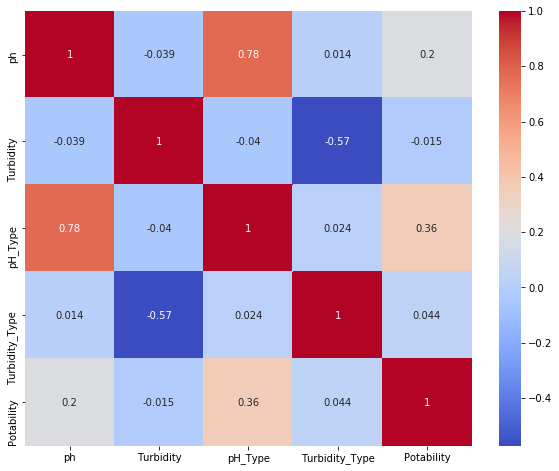

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [23]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=49)
#scale=StandardScaler()
#X_train1=scale.fit_transform(X_train)
#X_test1=scale.transform(X_test)
#y_train=y_train.values
#y_test=y_test.values
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Accuracy_score=[]
def predict(model):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    Accuracy_score.append(accuracy_score(y_test,preds))
    print('Accuracy is',accuracy_score(y_test,preds))
    print('Confusion matrix of the model is',confusion_matrix(y_test,preds))
    print('Classification report:',classification_report(y_test,preds))
    joblib.dump(model,'algorithms.sav')

(2228, 4) (557, 4) (2228,) (557,)


In [41]:
# XGBClassifier
predict(XGBClassifier())

[16:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is 1.0
Confusion matrix of the model is [[296   0]
 [  0 261]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00       261

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



In [42]:
# GradientBoostingClassifier
predict(GradientBoostingClassifier())

Accuracy is 1.0
Confusion matrix of the model is [[296   0]
 [  0 261]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00       261

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



In [43]:
# RandomForestClassfier
predict(RandomForestClassifier())

Accuracy is 1.0
Confusion matrix of the model is [[296   0]
 [  0 261]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00       261

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



In [44]:
# DecisionTreeClassifier
predict(DecisionTreeClassifier())

Accuracy is 1.0
Confusion matrix of the model is [[296   0]
 [  0 261]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00       261

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



In [45]:
# SupportVectorClassifier
predict(SVC())

Accuracy is 0.9425493716337523
Confusion matrix of the model is [[264  32]
 [  0 261]]
Classification report:               precision    recall  f1-score   support

           0       1.00      0.89      0.94       296
           1       0.89      1.00      0.94       261

    accuracy                           0.94       557
   macro avg       0.95      0.95      0.94       557
weighted avg       0.95      0.94      0.94       557



In [46]:
Accuracy_score

[1.0, 1.0, 1.0, 1.0, 0.9425493716337523]

In [47]:
# ANN
network=models.Sequential()

In [48]:
network.add(layers.Dense(units=16, activation='relu',input_shape= (X_train.shape[1],)))
network.add(layers.Dense(units=16, activation='relu'))
network.add(layers.Dense(units=3, activation='sigmoid'))

In [49]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [50]:
network.compile(optimizer='adam', 
              loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [51]:
y_pred_ann=network.predict(X_test, verbose=0)
y_pred_ann

array([[0.6126292 , 0.9513537 , 0.6687904 ],
       [0.60797685, 0.97744423, 0.75901175],
       [0.58621997, 0.97099453, 0.69040775],
       ...,
       [0.59607303, 0.9726428 , 0.75089586],
       [0.5535881 , 0.97895885, 0.69228345],
       [0.5946163 , 0.98712885, 0.7196379 ]], dtype=float32)

In [36]:
#accuracy_score(y_test,abs(y_pred_ann), normalize= False)

In [39]:
#import joblib
#joblib.dump(model,'algorithms.sav')